<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/Riya/ARIMA_CP01_riya_Minecrafters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [66]:
df.head(4)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,...,Pressure_switch,Oil_level,Caudal_impulses,year,month,day,hour,minute,second,moving_average
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,0,NaN
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,10,NaN
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,19,0.040833
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,29,0.040833


In [5]:
# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Extract year, month, day, hour, minute, and second
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second


df.head(3)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,...,LPS,Pressure_switch,Oil_level,Caudal_impulses,year,month,day,hour,minute,second
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,10
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,...,0.0,1.0,1.0,1.0,2020,2,1,0,0,19


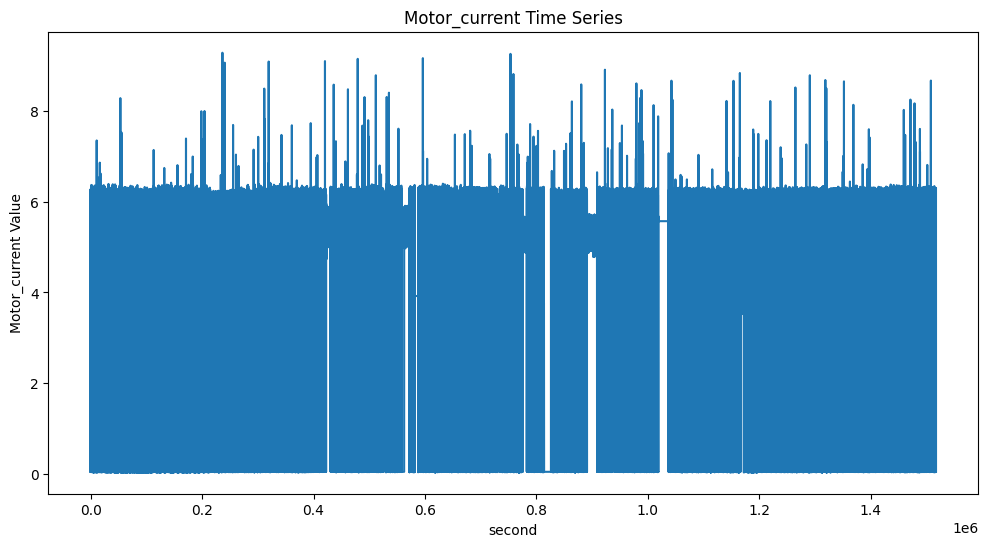

In [10]:
# Plot the 'Motor_current' time series
plt.figure(figsize=(12, 6))
plt.plot(df['Motor_current'])
plt.title('Motor_current Time Series')
plt.xlabel('second')
plt.ylabel('Motor_current Value')
plt.show()


In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit an ARIMA model
model = sm.tsa.ARIMA(df['Motor_current'], order=(1, 1, 1))
results = model.fit()

# Print the model summary
print(results.summary())



                               SARIMAX Results                                
Dep. Variable:          Motor_current   No. Observations:              1516948
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1271233.303
Date:                Fri, 15 Sep 2023   AIC                        2542472.607
Time:                        17:21:32   BIC                        2542509.304
Sample:                             0   HQIC                       2542482.540
                            - 1516948                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0742      0.026      2.820      0.005       0.023       0.126
ma.L1         -0.0103      0.026     -0.393      0.694      -0.062       0.041
sigma2         0.3129   6.64e-05   4710.201      0.0

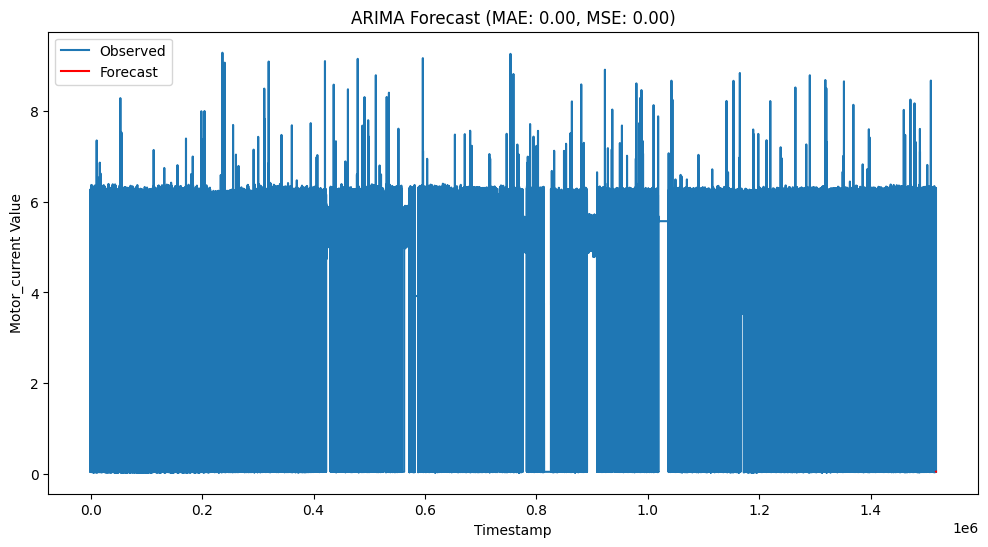

In [14]:
n_forecast_steps = 10   #number of forecast steps

# Make predictions
predictions = results.predict(start=len(df), end=len(df) + n_forecast_steps - 1, dynamic=False)

# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = df['Motor_current'].iloc[-n_forecast_steps:]
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Motor_current'], label='Observed')
plt.plot(predictions, label='Forecast', color='red')
plt.title(f'ARIMA Forecast (MAE: {mae:.2f}, MSE: {mse:.2f})')
plt.xlabel('Timestamp')
plt.ylabel('Motor_current Value')
plt.legend()
plt.show()


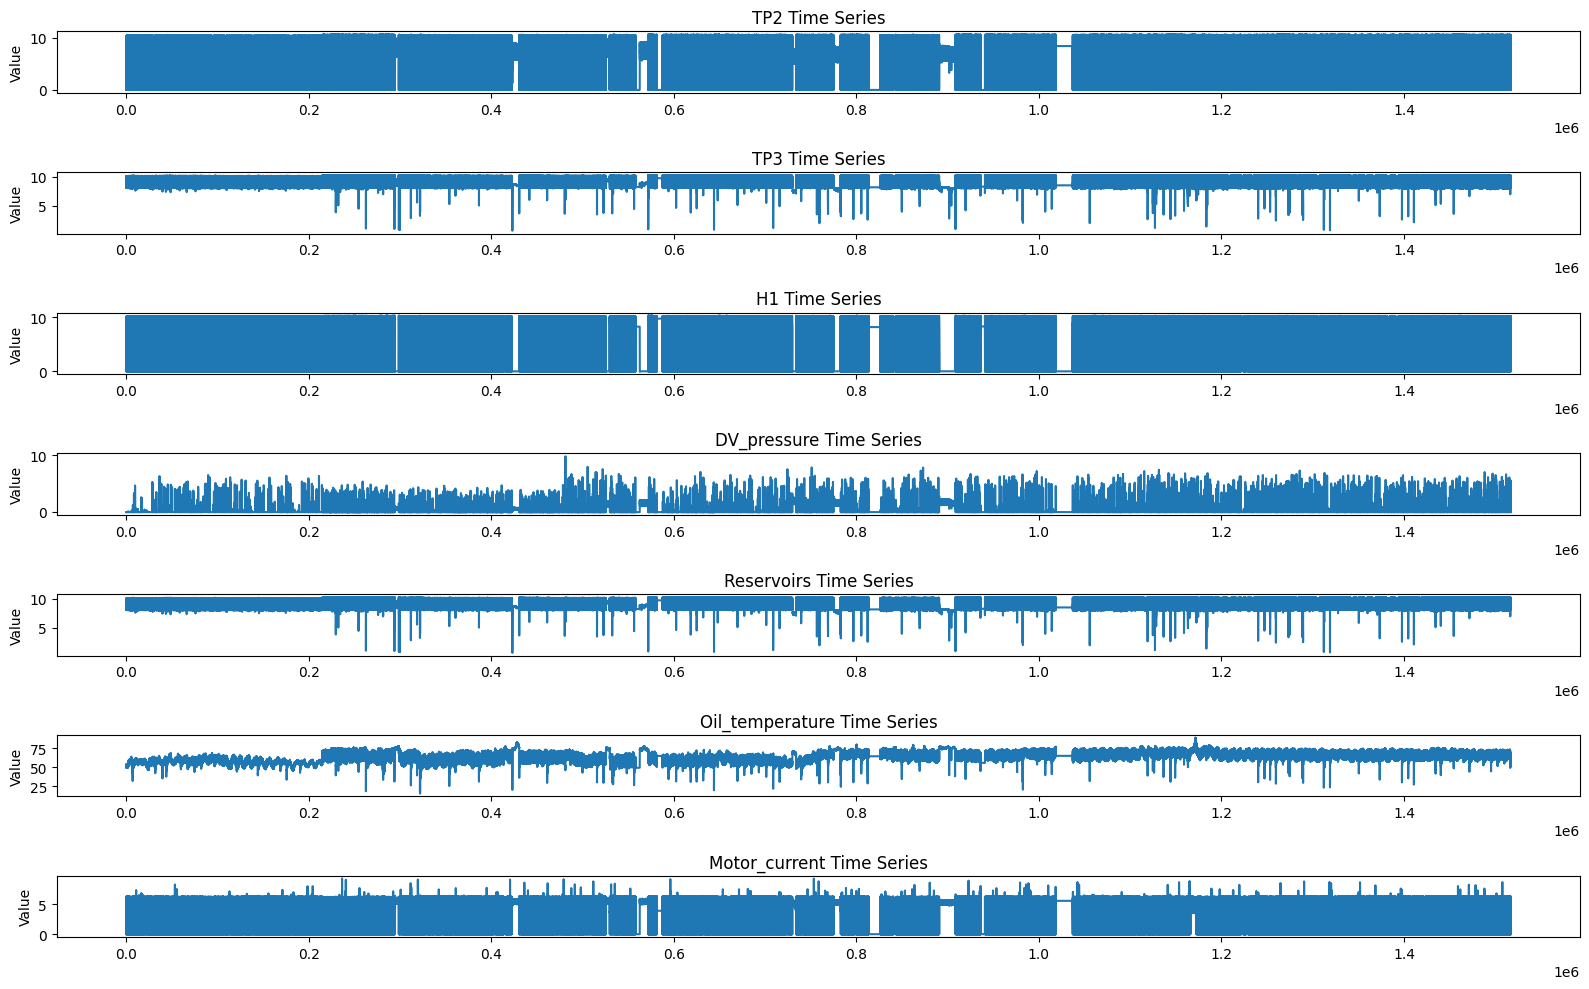

In [15]:
# Create subplots for each time series
plt.figure(figsize=(16, 10))

columns_to_plot = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(df[col])
    plt.title(f'{col} Time Series')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
decomposition = seasonal_decompose(df['Motor_current'], model='additive', freq=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Motor_current'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


ValueError: ignored

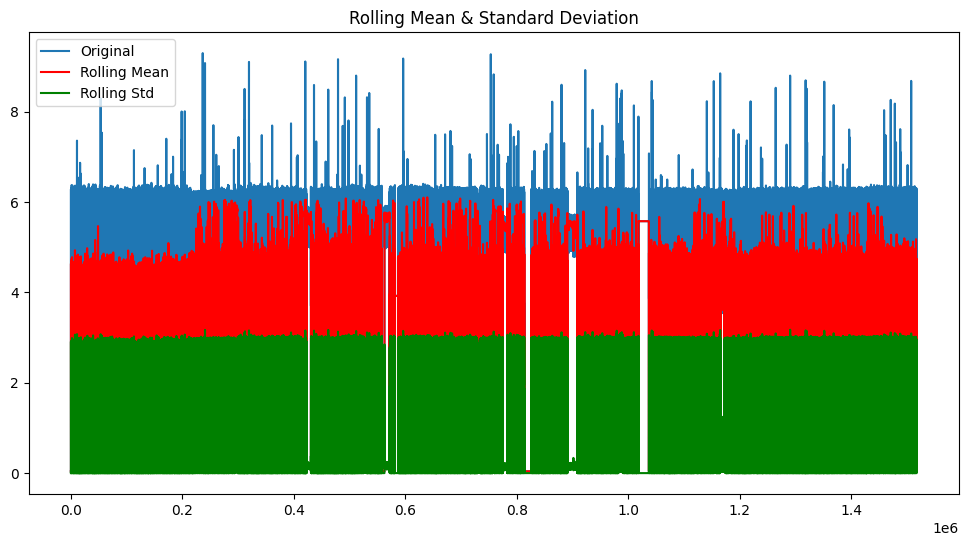

In [19]:
rolmean = df['Motor_current'].rolling(window=30).mean()
rolstd = df['Motor_current'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Motor_current'], label='Original')
plt.plot(rolmean, label='Rolling Mean', color='red')
plt.plot(rolstd, label='Rolling Std', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure the df is sorted chronologically
df.sort_index(inplace=True)

# Split the df into training and testing sets (e.g., first 80% for training, last 20% for testing)
split_percentage = 0.8
split_index = int(len(df) * split_percentage)

train_df = df[:split_index].copy()  # Use .copy() to avoid SettingWithCopyWarning
test_df = df[split_index:].copy()    # Use .copy() to avoid SettingWithCopyWarning

# Feature selection
train_df['Motor_current_lag1'] = train_df['Motor_current'].shift(1)
test_df['Motor_current_lag1'] = test_df['Motor_current'].shift(1)

# Drop rows with missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Split the df into features and target variable
X_train = train_df[['Motor_current_lag1']]
y_train = train_df['Motor_current']

X_test = test_df[['Motor_current_lag1']]
y_test = test_df['Motor_current']

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict motor current for the next second
next_second_prediction = model.predict(X_test.iloc[0:1])  # Predict for the first row of the test set

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

print(f"Predicted Motor Current for the Next Second: {next_second_prediction[0]:.2f}")


Mean Squared Error (MSE): 0.37
Mean Absolute Error (MAE): 0.17
R-squared (R2) Score: 0.93
Predicted Motor Current for the Next Second: 5.88


#MOVING AVERAGE

In [24]:
# Define the number of previous values to consider for the moving average
n = 5  # You can adjust this to your preferred number of previous values

# Calculate the moving average of the last 'n' values
moving_average = df['Motor_current'].tail(n).mean()

print(f"Predicted Motor Current for the Next Second using Moving Average: {moving_average:.2f}")


Predicted Motor Current for the Next Second using Moving Average: 0.04


In [28]:

n = 5  # You can adjust this to your preferred number of previous values

# Calculate the moving average of the last 'n' values
moving_average = df['DV_pressure'].tail(n).mean()

print(f"Predicted DV Pressure for the Next Second using Moving Average: {moving_average:.2f}")

Predicted DV Pressure for the Next Second using Moving Average: -0.02


In [29]:
# Define the number of previous values to consider for the moving average
n = 5  # You can adjust this to your preferred number of previous values

# Calculate the moving average of the last 'n' values
moving_average = df['Oil_temperature'].tail(n).mean()

print(f"Predicted Oil Temperature for the Next Second using Moving Average: {moving_average:.2f}")

Predicted Oil Temperature for the Next Second using Moving Average: 59.58


In [43]:
import pandas as pd


# Ensure the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by 'timestamp'
df.sort_values(by='timestamp', inplace=True)

# Split the data into training (up to June) and testing (after June) sets
train_data = df[df['timestamp'] < '2020-07-01']
test_data = df[df['timestamp'] >= '2020-07-01']

# Calculate the moving average on the training data (e.g., using the last 5 seconds)
n = 100  # Number of previous seconds to consider for the moving average
moving_average = train_data['Motor_current'].rolling(window=n).mean()

# Predict the next second's motor current using the moving average
last_timestamp = train_data['timestamp'].max()
next_second_timestamp = last_timestamp + pd.Timedelta(seconds=1)
predicted_next_second_current = moving_average.iloc[-1]  # Use the last moving average value

print(f"Predicted Motor Current for the Next Second using Moving Average: {predicted_next_second_current:.2f}")


Predicted Motor Current for the Next Second using Moving Average: 2.46


Predicted Motor Current for the Next Second using Moving Average: 1.49


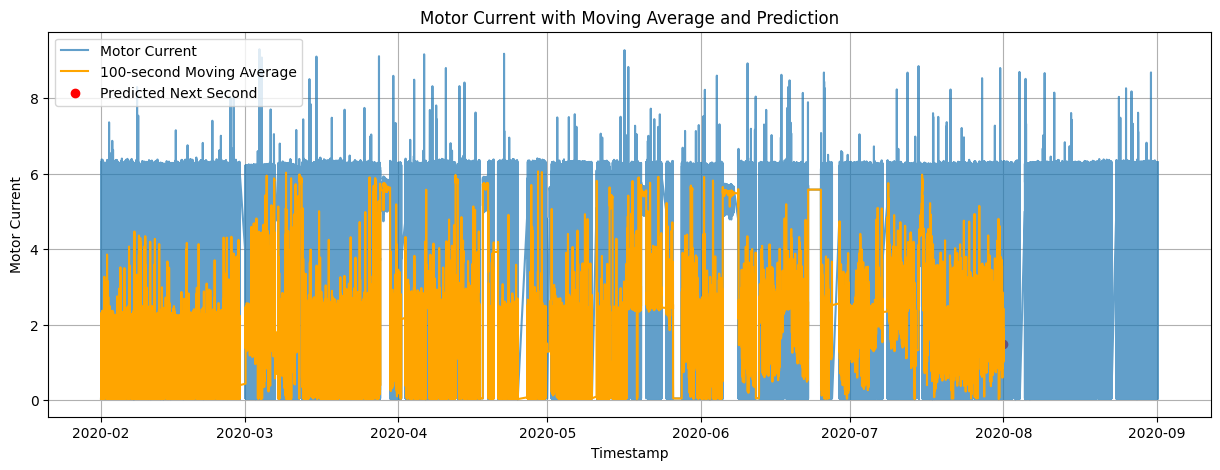

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'timestamp'
df.sort_values(by='timestamp', inplace=True)

# Split the data into training (up to June) and testing (after June) sets
train_data = df[df['timestamp'] < '2020-08-01']
test_data = df[df['timestamp'] >= '2020-08-01']

# Calculate the moving average on the training data (e.g., using the last 100 seconds)
n = 100  # Number of previous seconds to consider for the moving average
moving_average = train_data['Motor_current'].rolling(window=n).mean()

# Predict the next second's motor current using the moving average
last_timestamp = train_data['timestamp'].max()
next_second_timestamp = last_timestamp + pd.Timedelta(seconds=1)
predicted_next_second_current = moving_average.iloc[-1]  # Use the last moving average value

print(f"Predicted Motor Current for the Next Second using Moving Average: {predicted_next_second_current:.2f}")

# Plot the original data, the moving average, and the prediction
plt.figure(figsize=(15, 5))
plt.plot(df['timestamp'], df['Motor_current'], label='Motor Current', alpha=0.7)
plt.plot(train_data['timestamp'], moving_average, label=f'{n}-second Moving Average', color='orange')
plt.scatter(next_second_timestamp, predicted_next_second_current, color='red', marker='o', label='Predicted Next Second')
plt.xlabel('Timestamp')
plt.ylabel('Motor Current')
plt.title('Motor Current with Moving Average and Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
import pandas as pd

# Sort the DataFrame by 'timestamp' if it's not already sorted
df.sort_values(by='timestamp', inplace=True)

# Define the number of periods for the moving average
n_periods = 3  # You can adjust this value to change the window size

# Calculate the moving average using the rolling() function
df['moving_average'] = df['Motor_current'].rolling(window=n_periods).mean()

# Print the DataFrame with the moving average column

df.head(4)


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,...,Pressure_switch,Oil_level,Caudal_impulses,year,month,day,hour,minute,second,moving_average
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,0,NaN
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,10,NaN
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,19,0.040833
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,...,1.0,1.0,1.0,2020,2,1,0,0,29,0.040833


#ARIMA

In [9]:
# import pandas as pd
# import statsmodels.api as sm

# # Assuming you have loaded your data into a DataFrame 'df'
# # Define the order for your ARIMA model (e.g., ARIMA(1, 0, 1))
# p = 1  # Autoregressive order
# d = 0  # Differencing order
# q = 1  # Moving average order

# arima_model = sm.tsa.ARIMA(df['Motor_current'], order=(p, d, q))
# results = arima_model.fit()

# # Now you can use 'results' for forecasting and prediction
# next_second_prediction_arima = results.forecast(steps=1)
# print(f"Predicted Motor Current for the Next Second using ARIMA: {next_second_prediction_arima:.2f}")


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


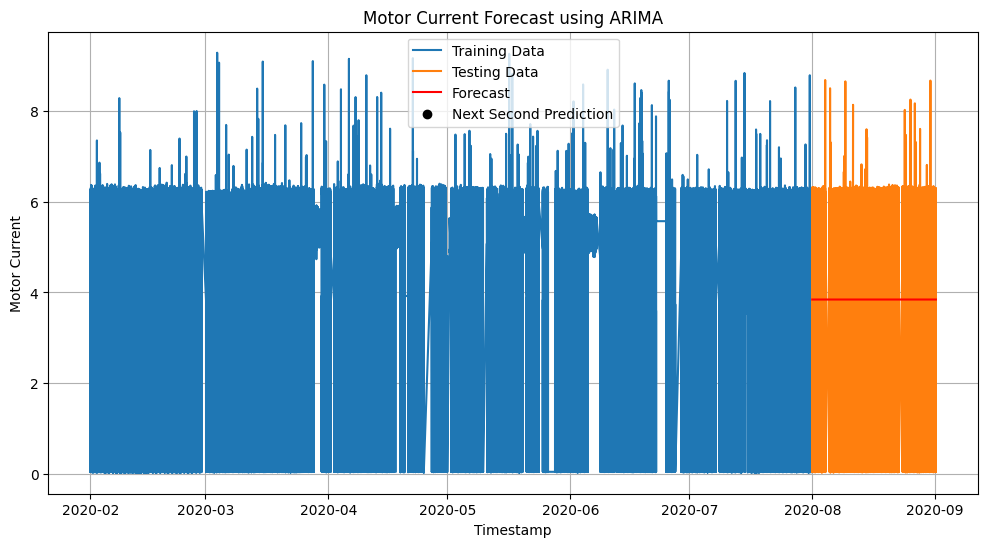

Predicted Motor Current for the Next Second using ARIMA: 3.84


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Ensure the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by 'timestamp'
df.sort_values(by='timestamp', inplace=True)

# Split the data into training (up to August 2020) and testing (from August 2020) sets
train_data = df[df['timestamp'] < '2020-08-01']
test_data = df[df['timestamp'] >= '2020-08-01']

# Define and fit an ARIMA model on the training data
order = (1, 1, 1)  # ARIMA order (p, d, q)
model = ARIMA(train_data['Motor_current'], order=order)
model_fit = model.fit()

# Predict the next second's motor current and forecast the entire test period
next_second_prediction = model_fit.forecast(steps=1).values[0]  # Use .values[0] to get the scalar value
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'forecast': forecast}, index=test_data.index)

# Plot the original 'Motor_current' data, the forecast, and the next-second prediction
plt.figure(figsize=(12, 6))
plt.plot(train_data['timestamp'], train_data['Motor_current'], label='Training Data')
plt.plot(test_data['timestamp'], test_data['Motor_current'], label='Testing Data')
plt.plot(test_data['timestamp'], forecast_df['forecast'], label='Forecast', color='red')
plt.scatter(test_data['timestamp'].iloc[0], next_second_prediction, color='black', marker='o', label='Next Second Prediction')
plt.title('Motor Current Forecast using ARIMA')
plt.xlabel('Timestamp')
plt.ylabel('Motor Current')
plt.legend()
plt.grid(True)
plt.show()

print(f"Predicted Motor Current for the Next Second using ARIMA: {next_second_prediction:.2f}")


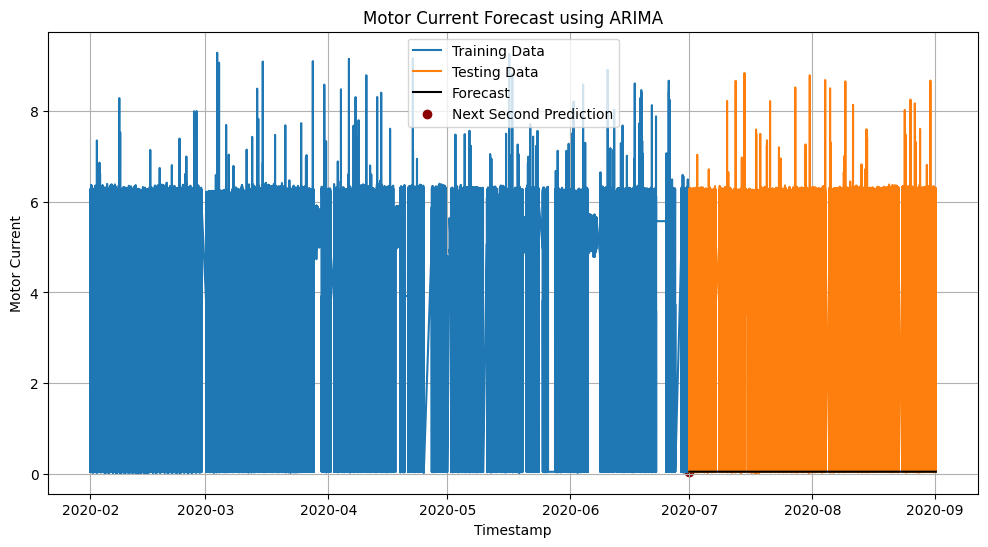

Predicted Motor Current for the Next Second using ARIMA: 0.04


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have loaded your data into a DataFrame 'df'
# Make sure your DataFrame has a 'timestamp' and 'Motor_current' column

# Ensure the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the DataFrame by 'timestamp'
df.sort_values(by='timestamp', inplace=True)

# Split the data into training (up to August 2020) and testing (from August 2020) sets
train_data = df[df['timestamp'] < '2020-07-01']
test_data = df[df['timestamp'] >= '2020-07-01']

# Define and fit an ARIMA model on the training data
order = (1, 1, 1)  # ARIMA order (p, d, q)
model = ARIMA(train_data['Motor_current'], order=order)
model_fit = model.fit()

# Predict the next second's motor current and forecast the entire test period
next_second_prediction = model_fit.forecast(steps=1).values[0]  # Use .values[0] to get the scalar value
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'forecast': forecast}, index=test_data.index)

# Create a Seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data['timestamp'], y=train_data['Motor_current'], label='Training Data')
sns.lineplot(x=test_data['timestamp'], y=test_data['Motor_current'], label='Testing Data')
sns.lineplot(x=test_data['timestamp'], y=forecast_df['forecast'], label='Forecast', color='black')
plt.scatter(test_data['timestamp'].iloc[0], next_second_prediction, color='darkred', marker='o', label='Next Second Prediction')
plt.title('Motor Current Forecast using ARIMA')
plt.xlabel('Timestamp')
plt.ylabel('Motor Current')
plt.legend()
plt.grid(True)
plt.show()

print(f"Predicted Motor Current for the Next Second using ARIMA: {next_second_prediction:.2f}")


In [10]:
# from statsmodels.tsa.arima.model import ARIMA
# train_data = df[df['timestamp'] < '2020-08-01']
# test_data = df[df['timestamp'] >= '2020-08-01']

# model = ARIMA(train_data.set_index('YEAR')['ANNUAL'], order=(1, 1, 1))
# model_fit = model.fit()

# forecast_steps = len(test_data)
# forecast = model_fit.forecast(steps=forecast_steps)

# plt.figure(figsize=(10, 6))
# plt.plot(train_data['YEAR'], train_data['ANNUAL'], label='Training Data')
# plt.plot(test_data['YEAR'], test_data['ANNUAL'], label='Testing Data')
# plt.plot(test_data['YEAR'], forecast, label='Forecast', color='red')
# plt.title('Rainfall Forecast using ARIMA')
# plt.xlabel('Year')
# plt.ylabel('Rainfall (mm)')
# plt.legend()
# plt.show()